In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score

# Step 1: Generate Random Data

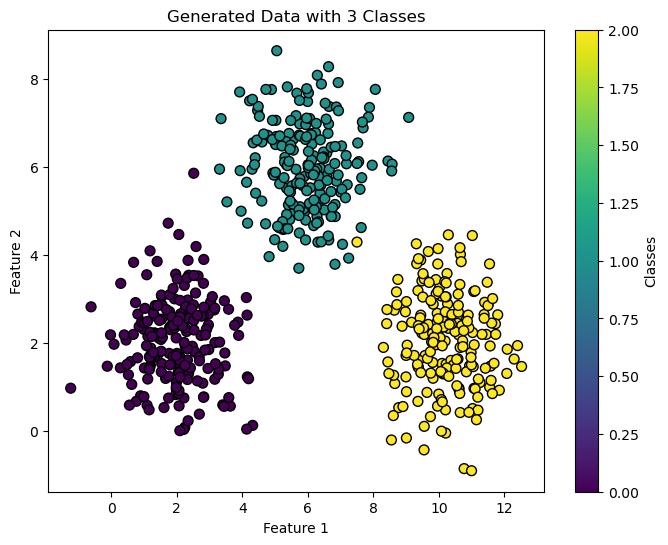

In [4]:
import numpy as np
import matplotlib.pyplot as plt


def generate_data(samples_per_class=200):  # Updated to 200 samples per class
    np.random.seed(42)
    # Class 1: Centered at (2, 2)
    class1 = np.random.randn(samples_per_class, 2) + np.array([2, 2])
    # Class 2: Centered at (6, 6)
    class2 = np.random.randn(samples_per_class, 2) + np.array([6, 6])
    # Class 3: Centered at (10, 2)
    class3 = np.random.randn(samples_per_class, 2) + np.array([10, 2])

    # Combine the data
    X = np.vstack([class1, class2, class3])
    y = np.array([0]*samples_per_class + [1]*samples_per_class + [2]*samples_per_class)
    return X, y

# Generate the data
X, y = generate_data(samples_per_class=200)

# Visualize the data
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap="viridis", edgecolor='k', s=50)
plt.title("Generated Data with 3 Classes")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.colorbar(label="Classes")
plt.show()


# Step 2: Prepare Data (Preprocessing)

In [8]:

# One-hot encode the labels
encoder = OneHotEncoder(sparse_output=False)
y_encoded = encoder.fit_transform(y.reshape(-1, 1))

# Split the data into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y_encoded, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

print(f"Train set Data: {X_train.shape[0]} samples")
print(f"Validation set Data: {X_val.shape[0]} samples")
print(f"Test set Data: {X_test.shape[0]} samples")

Train set Data: 360 samples
Validation set Data: 120 samples
Test set Data: 120 samples


# Step 3: Define the Neural Network

In [13]:

class NeuralNet:
    def __init__(self, input_size, hidden_size1, hidden_size2, hidden_size3, output_size, lr=0.01):
        # Initialize weights for all layers
        self.W1 = np.random.randn(input_size, hidden_size1)  # Input to Hidden Layer 1
        self.W2 = np.random.randn(hidden_size1, hidden_size2)  # Hidden Layer 1 to Hidden Layer 2
        self.W3 = np.random.randn(hidden_size2, hidden_size3)  # Hidden Layer 2 to Hidden Layer 3
        self.W4 = np.random.randn(hidden_size3, output_size)  # Hidden Layer 3 to Output Layer
        self.lr = lr

    def sigmoid(self, x, derivative=False):
        if derivative:
            return x * (1 - x)
        return 1 / (1 + np.exp(-x))

    def feed_forward(self, x):
        # Layer 1
        self.hidden_input1 = np.dot(x, self.W1)
        self.hidden_output1 = self.sigmoid(self.hidden_input1)

        # Layer 2
        self.hidden_input2 = np.dot(self.hidden_output1, self.W2)
        self.hidden_output2 = self.sigmoid(self.hidden_input2)

        # Layer 3
        self.hidden_input3 = np.dot(self.hidden_output2, self.W3)
        self.hidden_output3 = self.sigmoid(self.hidden_input3)

        # Output Layer
        self.output_input = np.dot(self.hidden_output3, self.W4)
        self.output = self.sigmoid(self.output_input)
        return self.output
    def backprop(self, x, y, output):
        # Output Layer Error
        output_error = y - output
        output_delta = output_error * self.sigmoid(output, derivative=True)

        # Hidden Layer 3 Error
        hidden_error3 = np.dot(output_delta, self.W4.T)
        hidden_delta3 = hidden_error3 * self.sigmoid(self.hidden_output3, derivative=True)

        # Hidden Layer 2 Error
        hidden_error2 = np.dot(hidden_delta3, self.W3.T)
        hidden_delta2 = hidden_error2 * self.sigmoid(self.hidden_output2, derivative=True)

        # Hidden Layer 1 Error
        hidden_error1 = np.dot(hidden_delta2, self.W2.T)
        hidden_delta1 = hidden_error1 * self.sigmoid(self.hidden_output1, derivative=True)

        # Update weights
        self.W4 += np.dot(self.hidden_output3.T, output_delta) * self.lr
        self.W3 += np.dot(self.hidden_output2.T, hidden_delta3) * self.lr
        self.W2 += np.dot(self.hidden_output1.T, hidden_delta2) * self.lr
        self.W1 += np.dot(x.T, hidden_delta1) * self.lr

    def train(self, x, y):
        output = self.feed_forward(x)
        self.backprop(x, y, output)

Epoch 0: Train Loss = 0.4370, Validation Loss = 0.4556, Train Accuracy = 34.44%, Validation Accuracy = 31.67%
Epoch 10: Train Loss = 0.2178, Validation Loss = 0.2566, Train Accuracy = 63.61%, Validation Accuracy = 60.00%
Epoch 20: Train Loss = 0.0961, Validation Loss = 0.1139, Train Accuracy = 83.33%, Validation Accuracy = 80.00%
Epoch 30: Train Loss = 0.0438, Validation Loss = 0.0501, Train Accuracy = 92.50%, Validation Accuracy = 90.83%
Epoch 40: Train Loss = 0.0274, Validation Loss = 0.0379, Train Accuracy = 95.00%, Validation Accuracy = 92.50%
Epoch 50: Train Loss = 0.0208, Validation Loss = 0.0326, Train Accuracy = 95.83%, Validation Accuracy = 92.50%
Epoch 60: Train Loss = 0.0162, Validation Loss = 0.0287, Train Accuracy = 96.94%, Validation Accuracy = 94.17%
Epoch 70: Train Loss = 0.0134, Validation Loss = 0.0261, Train Accuracy = 97.22%, Validation Accuracy = 93.33%
Epoch 80: Train Loss = 0.0117, Validation Loss = 0.0244, Train Accuracy = 98.06%, Validation Accuracy = 93.33%
Ep

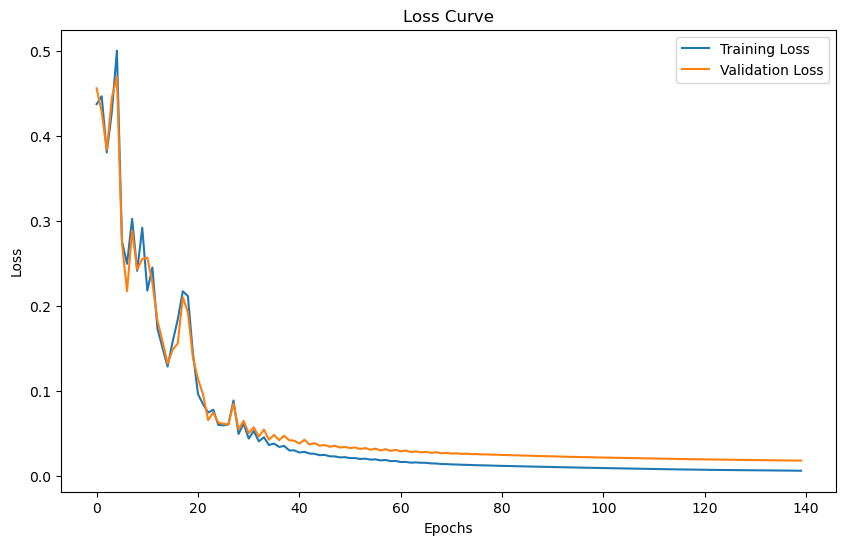

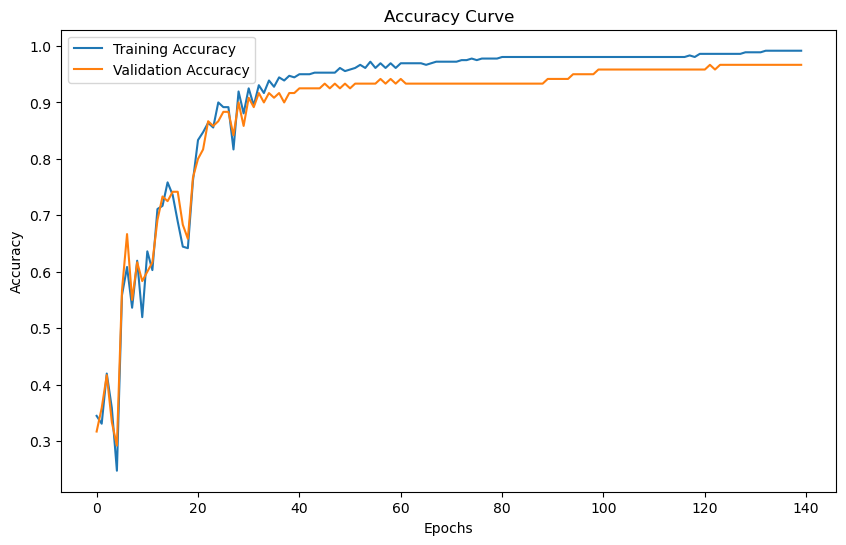

In [55]:
import numpy as np
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Define Neural Network class (simplified structure for demonstration)
class NeuralNet:
    def __init__(self, input_size, hidden_size1, hidden_size2, hidden_size3, output_size, lr):
        self.lr = lr
        # Initialize weights and biases
        self.W1 = np.random.randn(input_size, hidden_size1)
        self.b1 = np.zeros((1, hidden_size1))
        self.W2 = np.random.randn(hidden_size1, hidden_size2)
        self.b2 = np.zeros((1, hidden_size2))
        self.W3 = np.random.randn(hidden_size2, hidden_size3)
        self.b3 = np.zeros((1, hidden_size3))
        self.W4 = np.random.randn(hidden_size3, output_size)
        self.b4 = np.zeros((1, output_size))

    def relu(self, x):
        return np.maximum(0, x)

    def softmax(self, x):
        exp_x = np.exp(x - np.max(x, axis=1, keepdims=True))
        return exp_x / np.sum(exp_x, axis=1, keepdims=True)

    def feed_forward(self, X):
        self.z1 = np.dot(X, self.W1) + self.b1
        self.a1 = self.relu(self.z1)
        self.z2 = np.dot(self.a1, self.W2) + self.b2
        self.a2 = self.relu(self.z2)
        self.z3 = np.dot(self.a2, self.W3) + self.b3
        self.a3 = self.relu(self.z3)
        self.z4 = np.dot(self.a3, self.W4) + self.b4
        self.output = self.softmax(self.z4)
        return self.output

    def backpropagate(self, X, y):
        m = X.shape[0]
        # Gradients
        d_output = self.output - y
        dW4 = np.dot(self.a3.T, d_output) / m
        db4 = np.sum(d_output, axis=0, keepdims=True) / m

        d_hidden3 = np.dot(d_output, self.W4.T) * (self.a3 > 0)
        dW3 = np.dot(self.a2.T, d_hidden3) / m
        db3 = np.sum(d_hidden3, axis=0, keepdims=True) / m

        d_hidden2 = np.dot(d_hidden3, self.W3.T) * (self.a2 > 0)
        dW2 = np.dot(self.a1.T, d_hidden2) / m
        db2 = np.sum(d_hidden2, axis=0, keepdims=True) / m

        d_hidden1 = np.dot(d_hidden2, self.W2.T) * (self.a1 > 0)
        dW1 = np.dot(X.T, d_hidden1) / m
        db1 = np.sum(d_hidden1, axis=0, keepdims=True) / m

        # Update weights and biases
        self.W4 -= self.lr * dW4
        self.b4 -= self.lr * db4
        self.W3 -= self.lr * dW3
        self.b3 -= self.lr * db3
        self.W2 -= self.lr * dW2
        self.b2 -= self.lr * db2
        self.W1 -= self.lr * dW1
        self.b1 -= self.lr * db1

    def train(self, X, y):
        self.feed_forward(X)
        self.backpropagate(X, y)

# Assuming X_train, y_train, X_val, y_val are predefined and properly split
# For demonstration, I'll assume one-hot encoded y_train and y_val

input_size = X_train.shape[1]
hidden_size1 = 50
hidden_size2 = 45
hidden_size3 = 40
output_size = y_train.shape[1]
lr = 0.01
epochs = 140

nn = NeuralNet(input_size, hidden_size1, hidden_size2, hidden_size3, output_size, lr)
train_losses, val_losses = [], []
train_accuracies, val_accuracies = [], []

for epoch in range(epochs):
    nn.train(X_train, y_train)
    train_output = nn.feed_forward(X_train)
    val_output = nn.feed_forward(X_val)

    # Compute loss
    train_loss = np.mean((y_train - train_output) ** 2)
    val_loss = np.mean((y_val - val_output) ** 2)
    train_losses.append(train_loss)
    val_losses.append(val_loss)

    # Compute accuracy
    train_accuracy = accuracy_score(np.argmax(y_train, axis=1), np.argmax(train_output, axis=1))
    val_accuracy = accuracy_score(np.argmax(y_val, axis=1), np.argmax(val_output, axis=1))
    train_accuracies.append(train_accuracy)
    val_accuracies.append(val_accuracy)

    if epoch % 10 == 0 or epoch == epochs - 1:
        print(f"Epoch {epoch}: Train Loss = {train_loss:.4f}, Validation Loss = {val_loss:.4f}, "
              f"Train Accuracy = {train_accuracy * 100:.2f}%, Validation Accuracy = {val_accuracy * 100:.2f}%")

# Plotting the training and validation losses
plt.figure(figsize=(10, 6))
plt.plot(train_losses, label="Training Loss")
plt.plot(val_losses, label="Validation Loss")
plt.title("Loss Curve")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

# Plotting the training and validation accuracies
plt.figure(figsize=(10, 6))
plt.plot(train_accuracies, label="Training Accuracy")
plt.plot(val_accuracies, label="Validation Accuracy")
plt.title("Accuracy Curve")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


# Visualize Training and Validation Loss and Accuracy

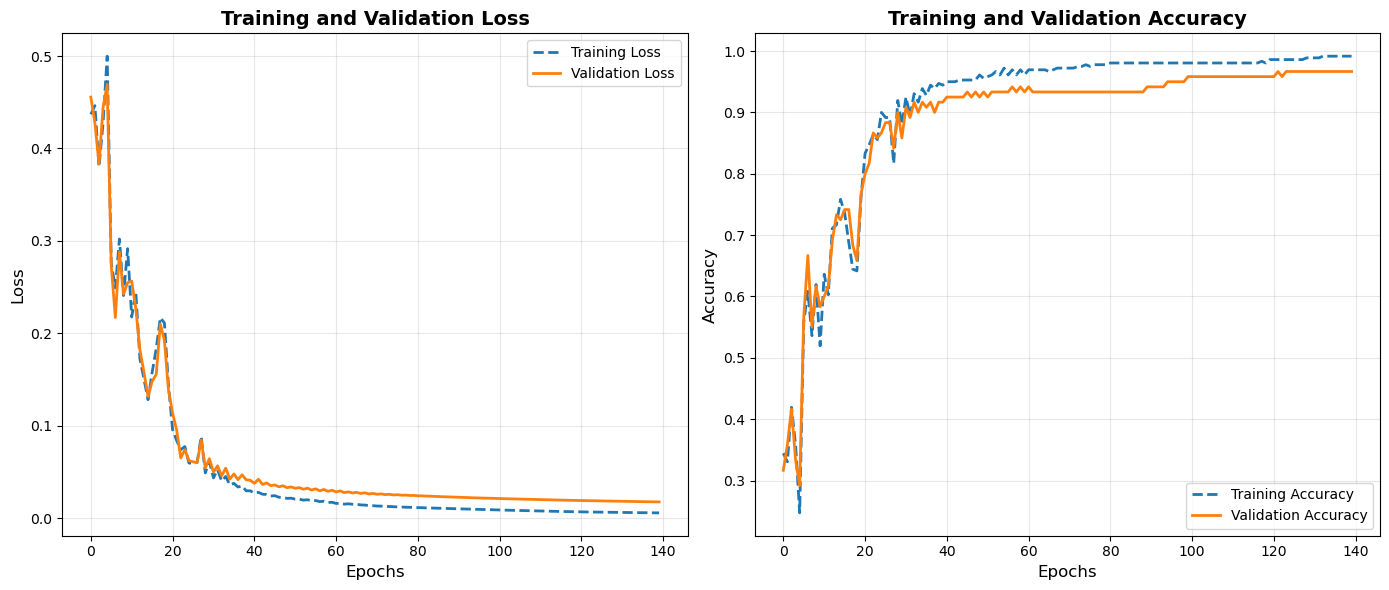

In [57]:
import matplotlib.pyplot as plt


plt.figure(figsize=(14, 6))

# Subplot 1: Loss
plt.subplot(1, 2, 1)
plt.plot(train_losses, label="Training Loss", linestyle='--', linewidth=2)
plt.plot(val_losses, label="Validation Loss", linestyle='-', linewidth=2)
plt.xlabel("Epochs", fontsize=12)
plt.ylabel("Loss", fontsize=12)
plt.title("Training and Validation Loss", fontsize=14, fontweight='bold')
plt.legend(fontsize=10)
plt.grid(alpha=0.3)

# Subplot 2: Accuracy
plt.subplot(1, 2, 2)
plt.plot(train_accuracies, label="Training Accuracy", linestyle='--', linewidth=2)
plt.plot(val_accuracies, label="Validation Accuracy", linestyle='-', linewidth=2)
plt.xlabel("Epochs", fontsize=12)
plt.ylabel("Accuracy", fontsize=12)
plt.title("Training and Validation Accuracy", fontsize=14, fontweight='bold')
plt.legend(fontsize=10)
plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()


# Step 6: Evaluate the Model

In [59]:

test_output = nn.feed_forward(X_test)
predicted_classes = np.argmax(test_output, axis=1)
actual_classes = np.argmax(y_test, axis=1)


# Compute accuracy

In [61]:

test_accuracy = accuracy_score(actual_classes, predicted_classes)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

Test Accuracy: 99.17%


# Visualize Predictions vs Actual Classes

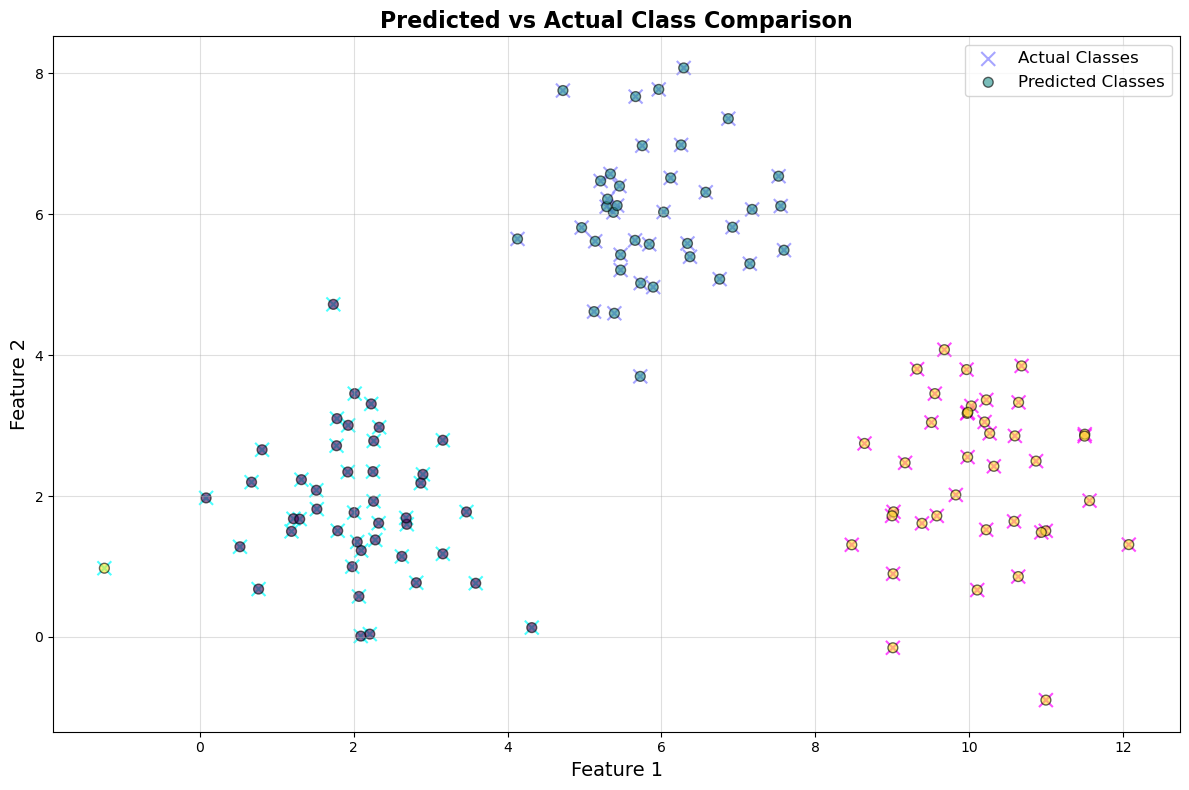

In [63]:
import matplotlib.pyplot as plt


plt.figure(figsize=(12, 8))

# Scatter plot for actual classes
plt.scatter(X_test[:, 0], X_test[:, 1], c=actual_classes, cmap="cool", marker="x", s=100, alpha=0.7, label="Actual Classes")

# Scatter plot for predicted classes
plt.scatter(X_test[:, 0], X_test[:, 1], c=predicted_classes, cmap="viridis", marker="o", edgecolor='k', s=50, alpha=0.6, label="Predicted Classes")

# Adding annotations
plt.title("Predicted vs Actual Class Comparison", fontsize=16, fontweight='bold')
plt.xlabel("Feature 1", fontsize=14)
plt.ylabel("Feature 2", fontsize=14)
plt.legend(loc="upper right", fontsize=12)
plt.grid(alpha=0.4)

# Display the plot
plt.tight_layout()
plt.show()
